In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the data
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [10]:
data["location"].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

There are 1305 different locations. There is one null value, which can be replaced with the most common value "Whitefield"

In [11]:
# Replacing the null value with the most common value "Whitefield"
data["location"]=data.location.fillna("Whitefield")

In [12]:
data["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

The 'size' column contains values of the type object. It could be converted to float type after extracting only the numerical value from the values.

In [13]:
# Replacing 1 RK with 0
data['size'] = data['size'].replace('1 RK', '0')

In [14]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
0               13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [15]:
# Extracting numerical part of the values.
data['size'] = data['size'].str.extract(r'(\d+)').astype(float)

In [16]:
data['size'].mean()

2.8027660853878533

There are 16 null values, which could be replaced with the mean value of 'size' column. However, there are no 2.807.. bedroom flats. So replacing the missing values with 3 BHK

In [17]:
data["size"]=data["size"].fillna(3)

In [18]:
data["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

The "society" column has 5560 null values, which is very large. Hence, removing the column from the dataframe.

In [19]:
data.drop(['society'],axis=1,inplace=True)

In [20]:
data["bath"].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

The "bath" column has 73 missing values. Looking at the value counts, we can see that there is a predominant value, which can replace the missing values.

In [21]:
data["bath"] = data["bath"].fillna(data["bath"].mode().iloc[0])

In [22]:
data["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [23]:
data.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony         609
price             0
dtype: int64

In [24]:
data.balcony.mean()

1.5843757375501535

In [25]:
data.groupby('size')['balcony'].value_counts()

size  balcony
0.0   0.0           7
      1.0           6
1.0   1.0         419
      0.0         179
      2.0          35
      3.0           2
2.0   1.0        2735
      2.0        2062
      0.0         355
      3.0         328
3.0   2.0        2331
      1.0        1245
      3.0         861
      0.0         219
4.0   2.0         458
      1.0         324
      3.0         287
      0.0         169
5.0   2.0         100
      1.0          95
      3.0          65
      0.0          39
6.0   2.0          69
      3.0          57
      1.0          39
      0.0          27
7.0   3.0          33
      2.0          27
      1.0          15
      0.0          10
8.0   2.0          23
      3.0          20
      0.0          15
      1.0          10
9.0   3.0          14
      1.0           9
      2.0           7
      0.0           4
10.0  3.0           3
11.0  3.0           2
      0.0           1
12.0  2.0           1
13.0  0.0           1
14.0  0.0           1
27.0  0.0         

The mean value of the balcony column is 1.58.. However, it could also depend on the number of rooms in the flat. For example, 2 balconies are the most common. But there can be no 2 balconies in a 1 RK flat and very few instances of 2 balconies in a 1 BHK flat

In [26]:
data['balcony']

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    NaN
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

In [27]:
# calculate the mode (most frequent value) within the group and then fill any missing values in that group with the calculated mode
def fill_mode(group):
    mode_value = group.mode()
    if not mode_value.empty:
        mode_value = mode_value.iloc[0]
    else:
        mode_value = np.nan
    return group.fillna(mode_value)

# Group by the "size" column and apply the custom fill_mode function
data['balcony'] = data.groupby('size')['balcony'].apply(fill_mode)
data['balcony']

/var/folders/qy/lb5596t96sd6y85j3bzzwkp00000gn/T/ipykernel_45074/876386246.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['balcony'] = data.groupby('size')['balcony'].apply(fill_mode)


0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    2.0
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

In [28]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         3
price           0
dtype: int64

There are only a negligible amoount of null values, which can be removed.

In [29]:
data.dropna(inplace=True)

In [30]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [31]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00


In [32]:
data["total_sqft"] = data["total_sqft"].str.extract(r'(\d+)').astype(float)

In [33]:
data.dtypes

area_type        object
availability     object
location         object
size            float64
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [34]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [35]:
data["area_type"].value_counts()

Super built-up  Area    8788
Built-up  Area          2418
Plot  Area              2024
Carpet  Area              87
Name: area_type, dtype: int64

In [36]:
#encode the area type with number
from sklearn.preprocessing import LabelEncoder
 
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the "area_type" column
data['Encoded_area_type'] = encoder.fit_transform(data['area_type'])

In [37]:
data["availability"].value_counts()

Ready To Move    10579
18-Dec             307
18-May             295
18-Apr             270
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [38]:
data['availability_encoded'] = data['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)

In [39]:
data['location'].value_counts()

Whitefield                   541
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
                            ... 
Brigade Road                   1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Maruthi HBCS Layout            1
Abshot Layout                  1
Name: location, Length: 1303, dtype: int64

In [40]:
locations=data['location'].value_counts()

In [41]:
locations_Less_than_10=locations[locations<=10]

In [42]:
locations_Less_than_10

1st Block Koramangala        10
Kalkere                      10
BTM 1st Stage                10
Nagadevanahalli              10
Naganathapura                10
                             ..
Brigade Road                  1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Maruthi HBCS Layout           1
Abshot Layout                 1
Name: location, Length: 1062, dtype: int64

In [43]:
data['location']=data['location'].apply(lambda x: "other" if x in locations_Less_than_10 else x)

In [44]:
data['location'].value_counts()

other                 2897
Whitefield             541
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [45]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Encoded_area_type,availability_encoded
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,2,1
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,0,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,3,1
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,3,1


In [46]:
corrmap = data.corr(numeric_only=True)

In [47]:
corrmap

,size,total_sqft,bath,balcony,price,Encoded_area_type,availability_encoded
size,1.000000,0.347480,0.892580,0.220106,0.399056,-0.124789,0.101225
total_sqft,0.347480,1.000000,0.388959,0.161960,0.573020,-0.050065,0.023498
bath,0.892580,0.388959,1.000000,0.231755,0.455778,-0.103768,0.077900
balcony,0.220106,0.161960,0.231755,1.000000,0.132060,0.088921,0.113649
price,0.399056,0.573020,0.455778,0.132060,1.000000,-0.057638,0.034386
Encoded_area_type,-0.124789,-0.050065,-0.103768,0.088921,-0.057638,1.000000,-0.137150
availability_encoded,0.101225,0.023498,0.077900,0.113649,0.034386,-0.137150,1.000000


<Axes: >

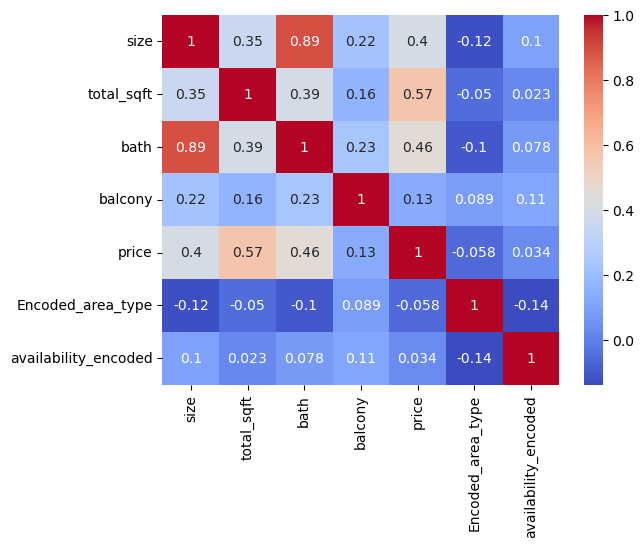

In [48]:
sns.heatmap(corrmap,cmap = "coolwarm", annot=True)

Size has a strong positive correlation with the number of bathrooms (bath) and the total square footage (total_sqft). This suggests that larger properties tend to have more bathrooms and larger total square footage.

Total square footage (total_sqft) has a moderate positive correlation with the number of bathrooms (bath) and the price. This implies that larger properties have more bathrooms and generally higher prices.

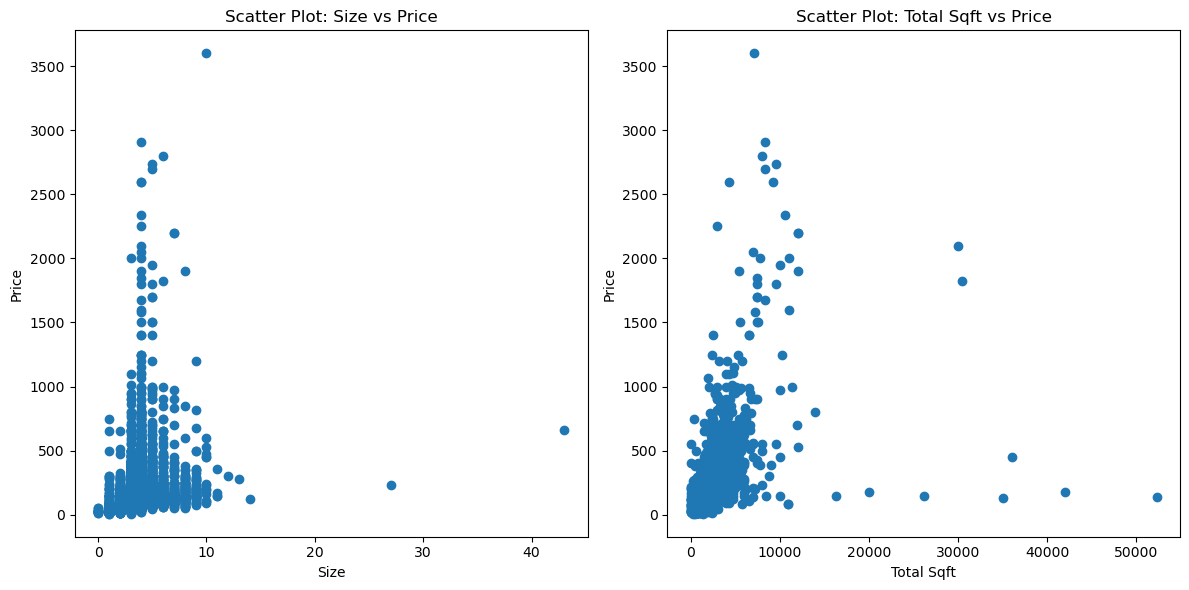

In [49]:
plt.figure(figsize=(12, 6))

# Scatter plot between size and price
plt.subplot(1, 2, 1)
plt.scatter(data['size'], data['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Scatter Plot: Size vs Price')

# Scatter plot between total_sqft and price
plt.subplot(1, 2, 2)
plt.scatter(data['total_sqft'], data['price'])
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.title('Scatter Plot: Total Sqft vs Price')

plt.tight_layout()
plt.show()

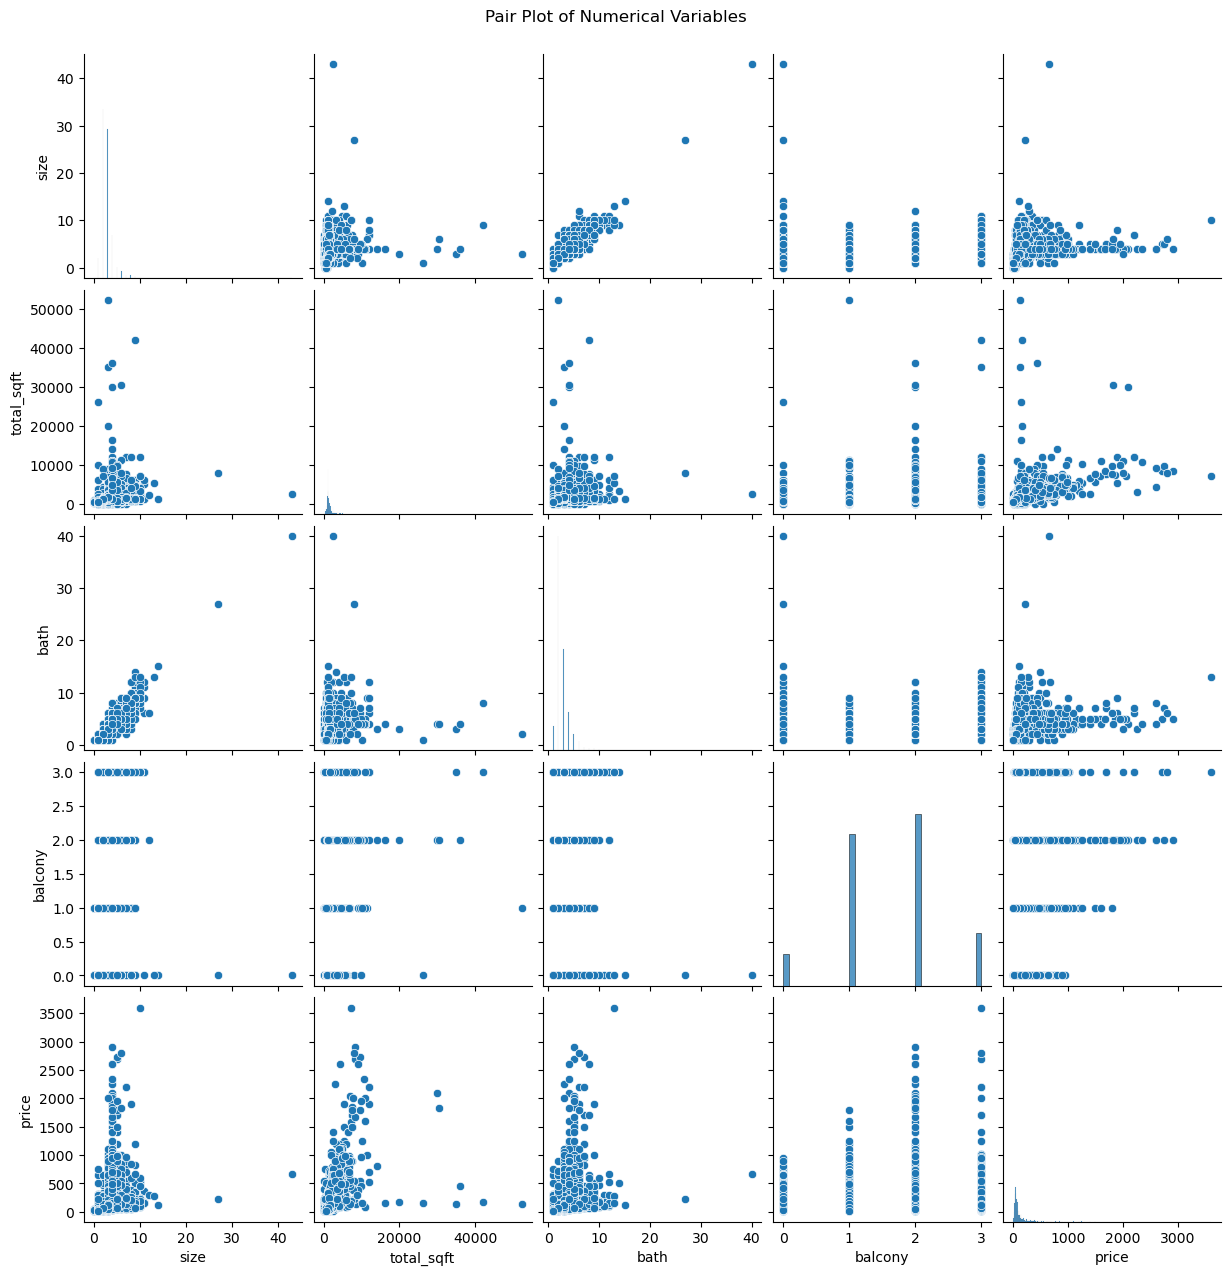

In [50]:
sns.pairplot(data, vars=['size', 'total_sqft', 'bath', 'balcony', 'price'])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

<Figure size 1000x600 with 0 Axes>

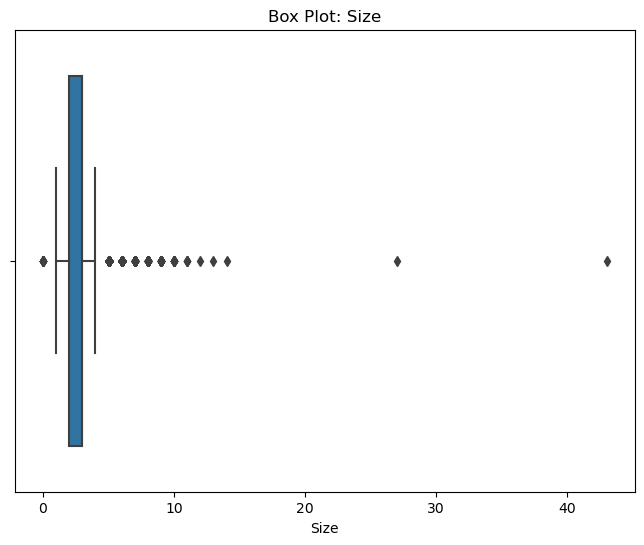

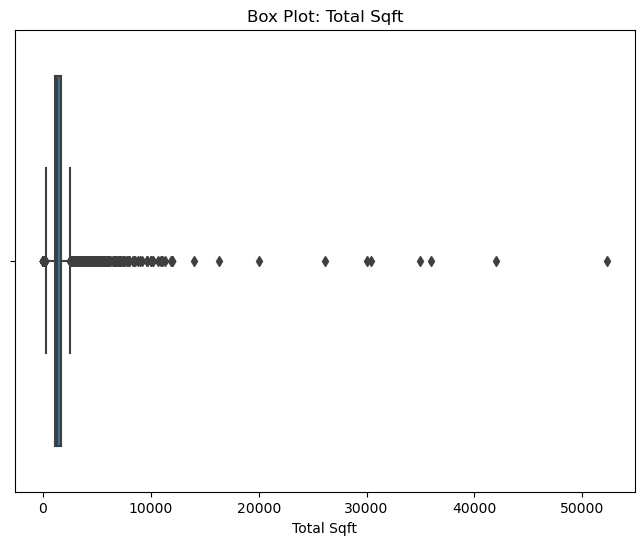

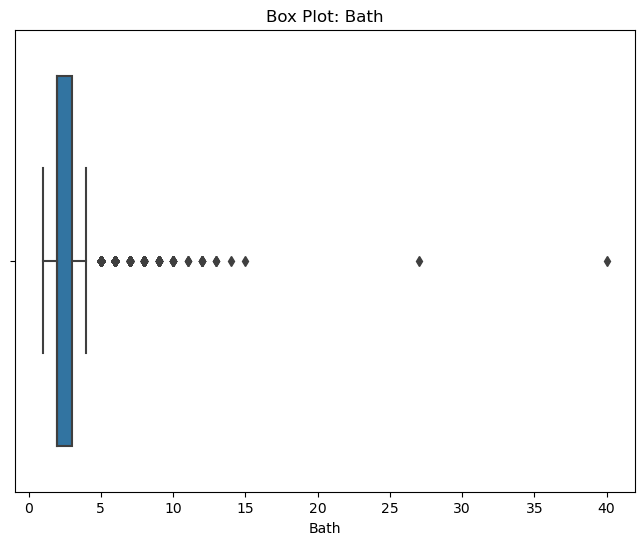

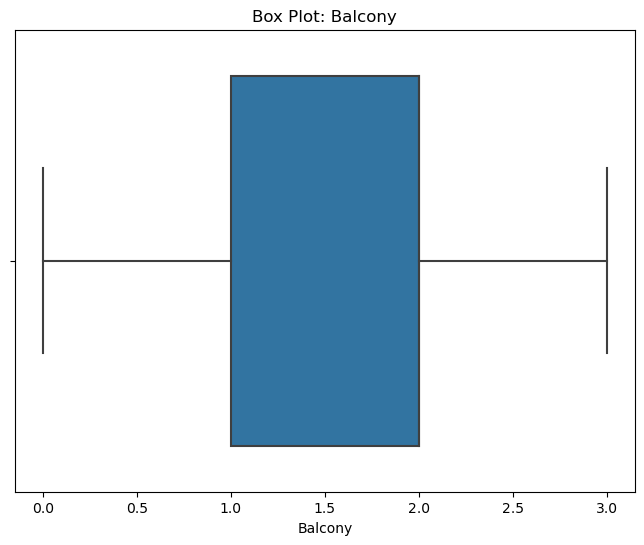

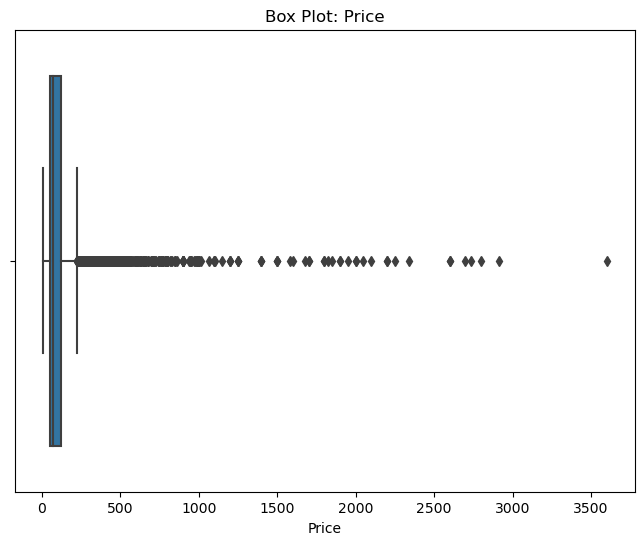

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create separate figures for each box plot
plt.figure(figsize=(10, 6))

# Box plot for 'size'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['size'])
plt.title('Box Plot: Size')
plt.xlabel('Size')
plt.show()

# Box plot for 'total_sqft'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['total_sqft'])
plt.title('Box Plot: Total Sqft')
plt.xlabel('Total Sqft')
plt.show()

# Box plot for 'bath'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['bath'])
plt.title('Box Plot: Bath')
plt.xlabel('Bath')
plt.show()

# Box plot for 'balcony'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['balcony'])
plt.title('Box Plot: Balcony')
plt.xlabel('Balcony')
plt.show()

# Box plot for 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'])
plt.title('Box Plot: Price')
plt.xlabel('Price')
plt.show()


In [52]:
# Removing outliers
data_cleaned = data[
    (data['size'] >= 1) & (data['size'] <= 4) &
    (data['total_sqft'] >= 470) & (data['total_sqft'] <= 2075) &
    (data['bath'] <= 5) &
    (data['price'] <= 147)
]

<Figure size 1000x600 with 0 Axes>

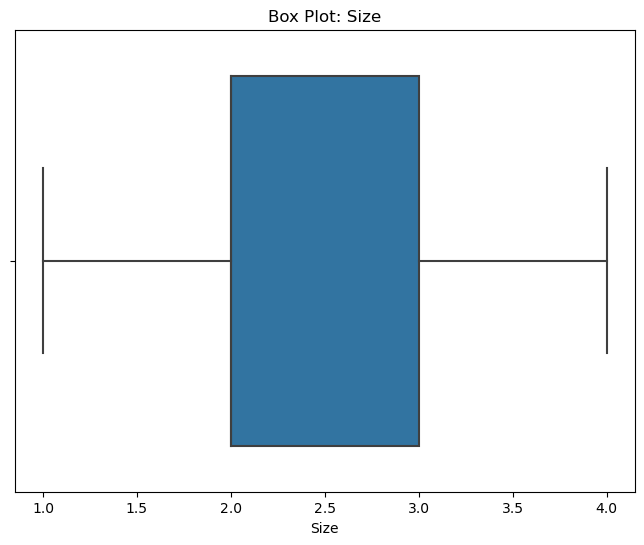

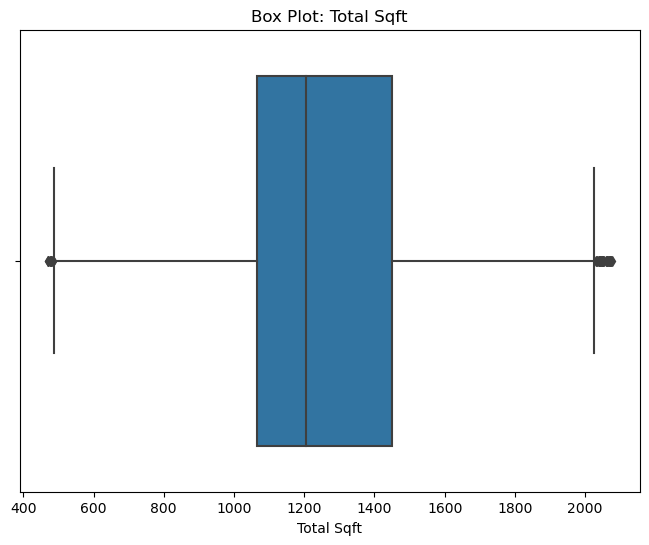

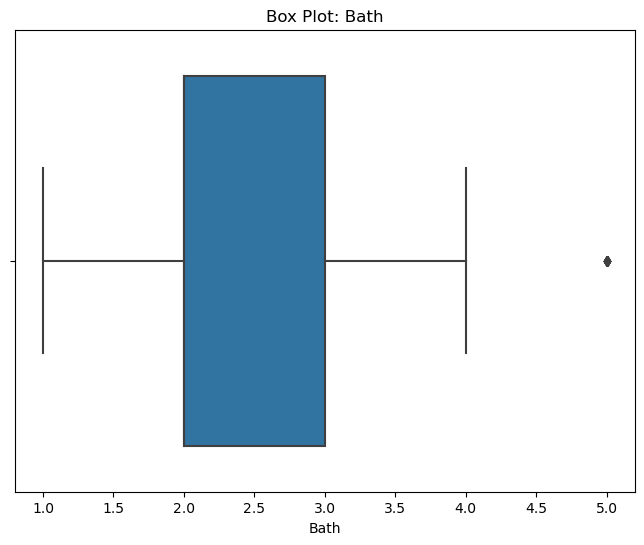

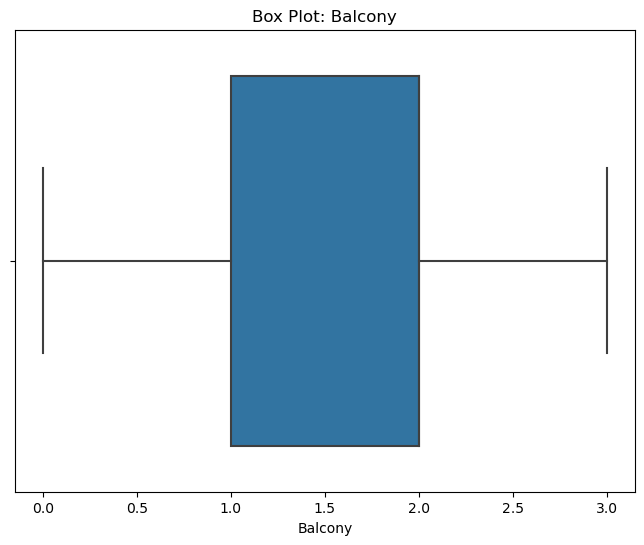

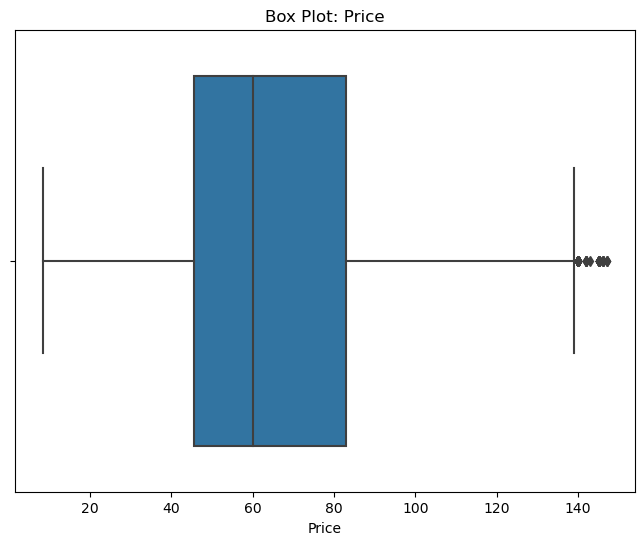

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create separate figures for each box plot
plt.figure(figsize=(10, 6))

# Box plot for 'size'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['size'])
plt.title('Box Plot: Size')
plt.xlabel('Size')
plt.show()

# Box plot for 'total_sqft'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['total_sqft'])
plt.title('Box Plot: Total Sqft')
plt.xlabel('Total Sqft')
plt.show()

# Box plot for 'bath'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['bath'])
plt.title('Box Plot: Bath')
plt.xlabel('Bath')
plt.show()

# Box plot for 'balcony'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['balcony'])
plt.title('Box Plot: Balcony')
plt.xlabel('Balcony')
plt.show()

# Box plot for 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['price'])
plt.title('Box Plot: Price')
plt.xlabel('Price')
plt.show()


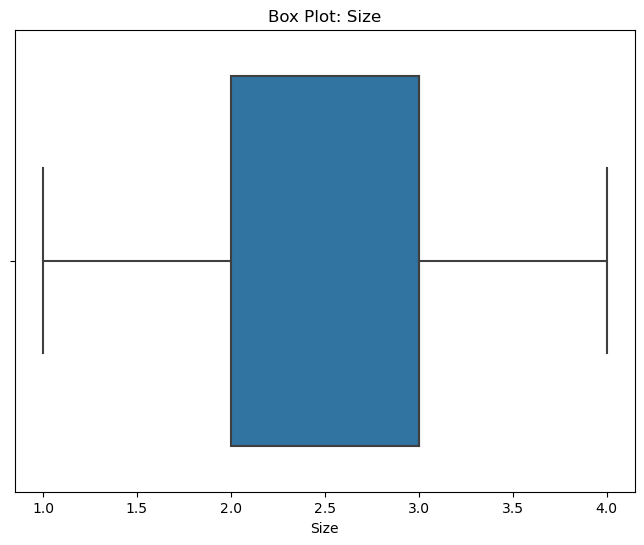

In [54]:
size1 = data[data["size"]<5]
size2 = size1[size1["size"]>0]
plt.figure(figsize=(8, 6))
sns.boxplot(x=size2['size'])
plt.title('Box Plot: Size')
plt.xlabel('Size')
plt.show()

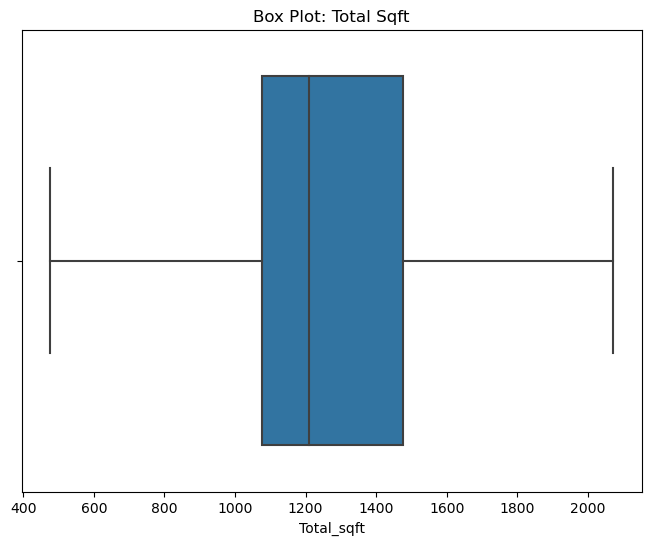

In [55]:
tot_sqft1 = data[data["total_sqft"]<2075]
tot_sqft2 = tot_sqft1[tot_sqft1["total_sqft"]>470]
plt.figure(figsize=(8, 6))
sns.boxplot(x=tot_sqft2['total_sqft'])
plt.title('Box Plot: Total Sqft')
plt.xlabel('Total_sqft')
plt.show()

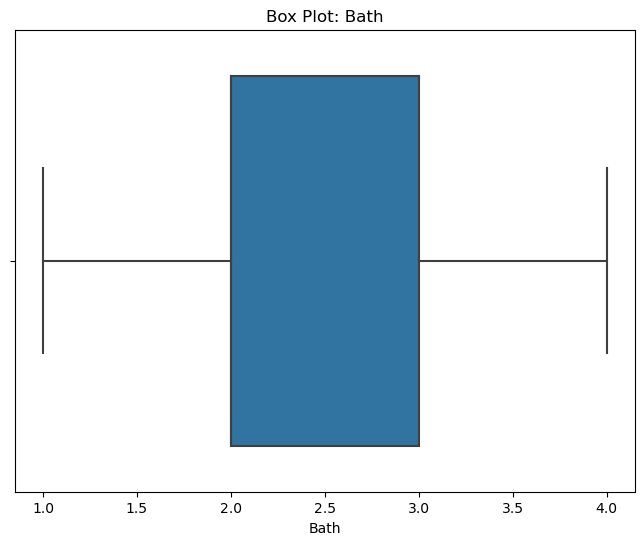

In [56]:
bath1 = data[data["bath"]<5]
plt.figure(figsize=(8, 6))
sns.boxplot(x=bath1['bath'])
plt.title('Box Plot: Bath')
plt.xlabel('Bath')
plt.show()

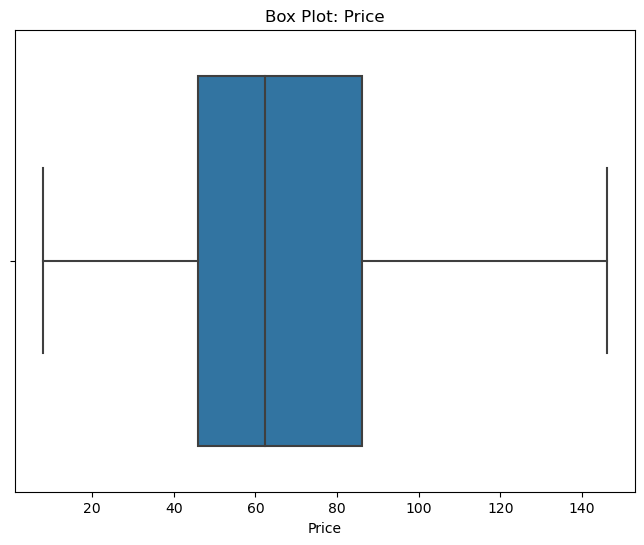

In [57]:
price1 = data[data["price"]<147]
plt.figure(figsize=(8, 6))
sns.boxplot(x=price1['price'])
plt.title('Box Plot: Price')
plt.xlabel('Price')
plt.show()

In [58]:
data_cleaned.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Encoded_area_type,availability_encoded
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3,0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,0,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,3,1
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,3,1
5,Super built-up Area,Ready To Move,Whitefield,2.0,1170.0,2.0,1.0,38.00,3,1


In [59]:
data_cleaned.shape

(10088, 10)

In [60]:
vars = data_cleaned.columns
for var in vars:
    print(data_cleaned[var].value_counts())

Super built-up  Area    7505
Built-up  Area          1768
Plot  Area               751
Carpet  Area              64
Name: area_type, dtype: int64
Ready To Move    7815
18-May            251
18-Dec            245
18-Apr            233
18-Aug            180
                 ... 
16-Jul              1
14-Nov              1
22-May              1
16-Mar              1
14-Jul              1
Name: availability, Length: 80, dtype: int64
other                  1873
Whitefield              403
Sarjapur  Road          302
Electronic City         288
Kanakpura Road          253
                       ... 
Giri Nagar                3
1st Block Jayanagar       3
Sarakki Nagar             3
Kodihalli                 3
HAL 2nd Stage             3
Name: location, Length: 241, dtype: int64
2.0    5393
3.0    3856
1.0     538
4.0     301
Name: size, dtype: int64
1200.0    553
1100.0    218
1000.0    154
1500.0    150
600.0     147
         ... 
555.0       1
1922.0      1
1778.0      1
1288.0      1
1379

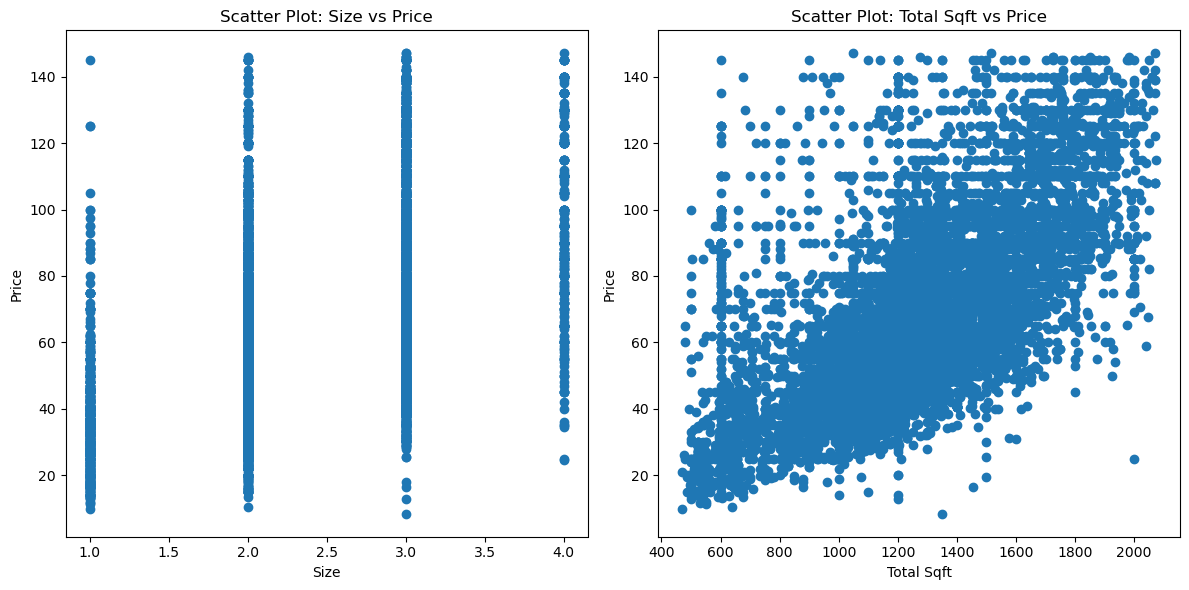

In [61]:
plt.figure(figsize=(12, 6))

# Scatter plot between size and price
plt.subplot(1, 2, 1)
plt.scatter(data_cleaned['size'], data_cleaned['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Scatter Plot: Size vs Price')

# Scatter plot between total_sqft and price
plt.subplot(1, 2, 2)
plt.scatter(data_cleaned['total_sqft'], data_cleaned['price'])
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.title('Scatter Plot: Total Sqft vs Price')

plt.tight_layout()
plt.show()

In [62]:
corrmapcl = data_cleaned.corr(numeric_only=True)

In [63]:
corrmapcl

,size,total_sqft,bath,balcony,price,Encoded_area_type,availability_encoded
size,1.000000,0.616375,0.764206,0.273601,0.517497,-0.016872,0.050490
total_sqft,0.616375,1.000000,0.587317,0.359109,0.643848,0.079776,0.027542
bath,0.764206,0.587317,1.000000,0.273642,0.558828,-0.010211,0.025891
balcony,0.273601,0.359109,0.273642,1.000000,0.173716,0.105849,0.143188
price,0.517497,0.643848,0.558828,0.173716,1.000000,0.009130,0.041585
Encoded_area_type,-0.016872,0.079776,-0.010211,0.105849,0.009130,1.000000,-0.121695
availability_encoded,0.050490,0.027542,0.025891,0.143188,0.041585,-0.121695,1.000000


<Axes: >

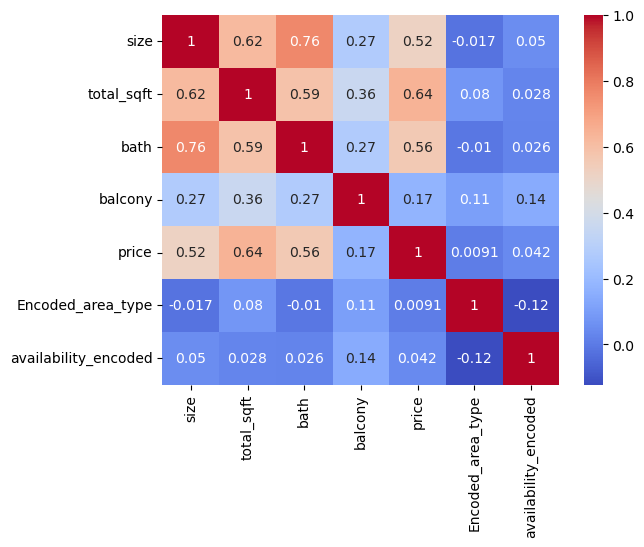

In [64]:
sns.heatmap(corrmapcl,cmap = "coolwarm", annot=True)

There is a strong positive correlation between 'size' and 'bath' (0.76), indicating that as the size of the property increases, the number of bathrooms tends to increase as well.

There is a moderately positive correlation between 'size' and 'total_sqft' (0.62), indicating that larger properties tend to have more square footage.

'Encoded_area_type' has a very weak correlation with other variables, indicating that this encoding might not have a strong linear relationship with the other variables.

'Availability_encoded' also has very weak correlations with other variables.

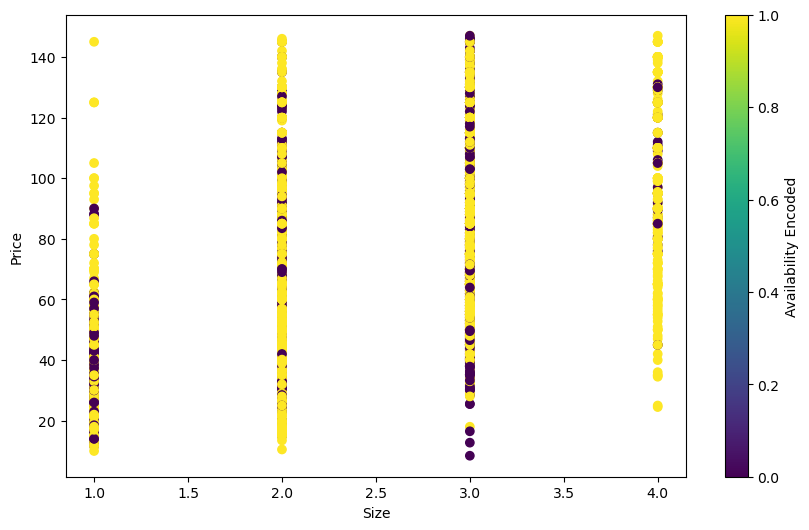

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x='size', y='price', c='availability_encoded', data=data_cleaned)

# Add a colorbar to show the mapping of 'availability_encoded'
cbar = plt.colorbar(scatter)
cbar.set_label('Availability Encoded')

# Set labels for x and y axes
ax.set_xlabel('Size')
ax.set_ylabel('Price')

# Show the plot
plt.show()

In [66]:
data_cleaned.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Encoded_area_type,availability_encoded
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3,0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,0,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,3,1
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,3,1
5,Super built-up Area,Ready To Move,Whitefield,2.0,1170.0,2.0,1.0,38.00,3,1


In [67]:
data_cleaned['total_sqft'].value_counts()

1200.0    553
1100.0    218
1000.0    154
1500.0    150
600.0     147
         ... 
555.0       1
1922.0      1
1778.0      1
1288.0      1
1379.0      1
Name: total_sqft, Length: 1167, dtype: int64

In [68]:
data_cleaned['total_sqft'].dtypes

dtype('float64')

In [69]:
#creating column for Price per sqft
data_cleaned["Price_per_sqft"]=data_cleaned["total_sqft"]/data_cleaned["price"]
data_cleaned.head()

/var/folders/qy/lb5596t96sd6y85j3bzzwkp00000gn/T/ipykernel_45074/814937149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Price_per_sqft"]=data_cleaned["total_sqft"]/data_cleaned["price"]


,area_type,availability,location,size,total_sqft,bath,balcony,price,Encoded_area_type,availability_encoded,Price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3,0,27.028411
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,0,1,23.225806
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,3,1,16.010526
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,3,1,23.529412
5,Super built-up Area,Ready To Move,Whitefield,2.0,1170.0,2.0,1.0,38.00,3,1,30.789474


In [70]:
dummies = pd.get_dummies(data_cleaned.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [71]:
data_cleaned = pd.concat([data_cleaned,dummies.drop('other',axis='columns')],axis='columns')
data_cleaned.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Encoded_area_type,availability_encoded,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,3,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,3,1,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,Ready To Move,Whitefield,2.0,1170.0,2.0,1.0,38.00,3,1,...,0,0,0,0,1,0,0,0,0,0


In [72]:
data_cleaned.reset_index(drop=True, inplace=True)

# Model Training

In [73]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [75]:
# Assuming 'X' contains your features and 'y' contains your target variable
X = data_cleaned.drop(columns=['area_type','availability','location','price'])  # Features
y = data_cleaned['price']  # Target variable

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [77]:
# Initialize the Linear Regression model
model = LinearRegression()

# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation and hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Best Parameters: {'fit_intercept': False}
Mean Squared Error (MSE): 145.51577293361245
Root Mean Squared Error (RMSE): 12.062991873229976
Mean Absolute Error (MAE): 8.721840975395436
R-squared (R2): 0.812162912942991


## Decision Tree Regressor

In [78]:
# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor()

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation and hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Squared Error (MSE): 2.0906088000529954
Root Mean Squared Error (RMSE): 1.4458937720500062
Mean Absolute Error (MAE): 0.6520414188965972
R-squared (R2): 0.9973013656233894


## Random Forest

In [79]:
# Initialize the Random Forest model
model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation and hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error (MSE): 0.7942557341195349
Root Mean Squared Error (RMSE): 0.8912102636973694
Mean Absolute Error (MAE): 0.3160969052714911
R-squared (R2): 0.9989747456205768


## Gradient Boosting

In [85]:
# Initialize the Gradient Boosting model
model = GradientBoostingRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation and hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Mean Squared Error (MSE): 0.8015862020041772
Root Mean Squared Error (RMSE): 0.8953134657784262
Mean Absolute Error (MAE): 0.5695545141069019
R-squared (R2): 0.9989652831842618


## XGBoost

In [113]:
# Initialize the XGBoost Regressor model
model = XGBRegressor()

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation and hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Mean Squared Error (MSE): 0.7505679791731297
Root Mean Squared Error (RMSE): 0.8663532646519719
Mean Absolute Error (MAE): 0.5731268062345809
R-squared (R2): 0.9990311393740768


## Support Vector Regressor

In [ ]:
# Initialize the Support Vector Regressor (SVR) model
model = SVR()

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'epsilon': [0.01, 0.1, 0.2]  # Epsilon parameter for epsilon-insensitive loss
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation and hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

## kNN Regressor

In [112]:
# Initialize the KNN Regressor model
model = KNeighborsRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],      # Number of neighbors
    'weights': ['uniform', 'distance']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation and hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Mean Squared Error (MSE): 21.074611681352312
Root Mean Squared Error (RMSE): 4.59070927867931
Mean Absolute Error (MAE): 2.236820559419808
R-squared (R2): 0.9727961196970116


## AdaBoost

In [111]:
# Initialize the AdaBoostRegressor model
model = AdaBoostRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation and hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Mean Squared Error (MSE): 41.783339150611674
Root Mean Squared Error (RMSE): 6.464003337763036
Mean Absolute Error (MAE): 5.110307725497
R-squared (R2): 0.9460645361300688


In [114]:
import pickle
with open("bhpmodel.pickle",'wb') as f:
    pickle.dump(best_model,f)

In [117]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))